
Library Installation: We install diffusers, transformers, and scipy for the necessary functions and models.


In [9]:
# Installing the necessary libraries
!pip install diffusers transformers scipy

import requests
from PIL import Image
from io import BytesIO
import torch
!pip install diffusers
from diffusers import StableDiffusionInpaintPipeline


Image Loading: The image is downloaded using its URL and loaded into a PIL Image object.

In [2]:
# Load the provided image
url = "https://drive.google.com/uc?export=download&id=17FCAXI5mS2Iof9NWQAmg68H2rGK0xTIc"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

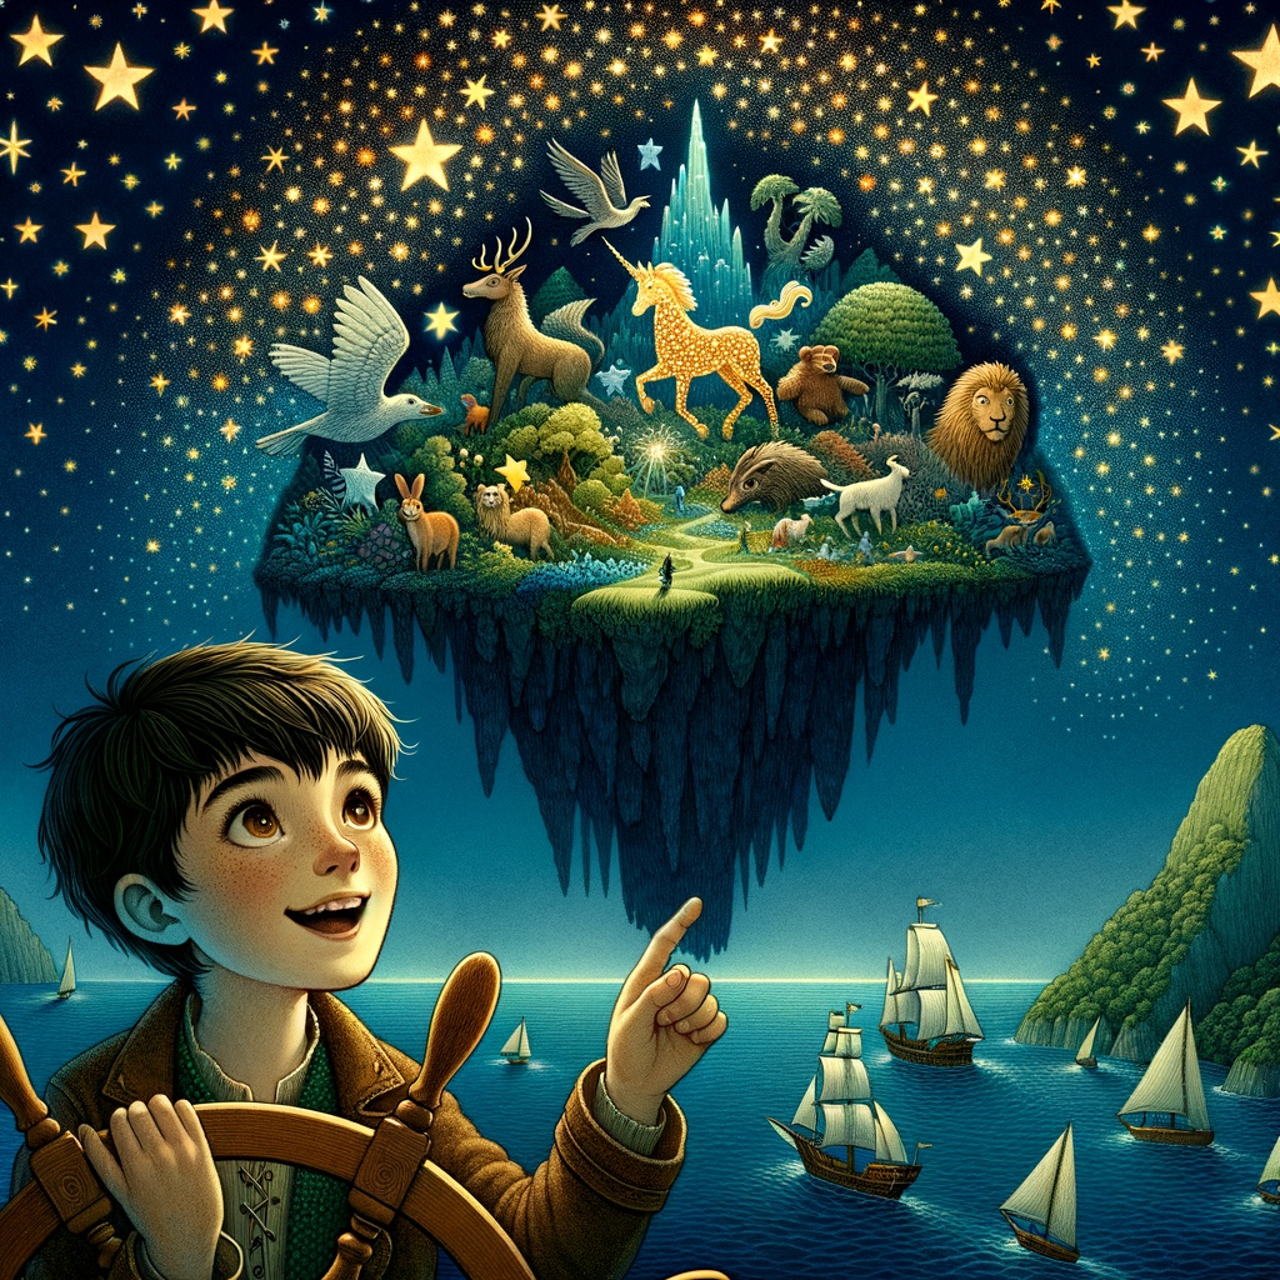

In [12]:
display(image)

Image Resizing: The image is resized to the new dimensions (1280x1280) to accommodate the additional 128 pixels on each side.

In [3]:

# Resize the image to add 128 pixels on each side (1024 + 256 = 1280)
new_size = (1280, 1280)
image = image.resize(new_size)

Model Loading: The Stable Diffusion Inpainting model is loaded. This model is capable of generating new image content that blends seamlessly with the existing image.

In [4]:
# Load the Stable Diffusion Inpainting pipeline
# Load the Stable Diffusion Inpainting pipeline
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting")
pipe = pipe.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Mask Preparation: A mask is created where the new pixels will be added. The mask is white (255) in the areas to be inpainted and black (0) elsewhere.
Inpainting: The model is used to fill in the new regions specified by the mask, generating a natural extension of the existing image

In [5]:
# Prepare the mask (indicating the new regions to be inpainted)
mask = Image.new("L", new_size, 0)
mask.paste(255, (0, 0, 1280, 128))  # Top border
mask.paste(255, (0, 1152, 1280, 1280))  # Bottom border
mask.paste(255, (0, 128, 128, 1152))  # Left border
mask.paste(255, (1152, 128, 1280, 1152))  # Right border

In [6]:
# Convert images to correct format
image_resized = image.convert("RGB")
mask = mask.convert("L")

In [7]:

# Perform inpainting to extend the image
outpainted_image = pipe(prompt="", image=image, mask_image=mask).images[0]




  0%|          | 0/50 [00:00<?, ?it/s]

Result Saving and Displaying: The final outpainted image is saved and displayed.

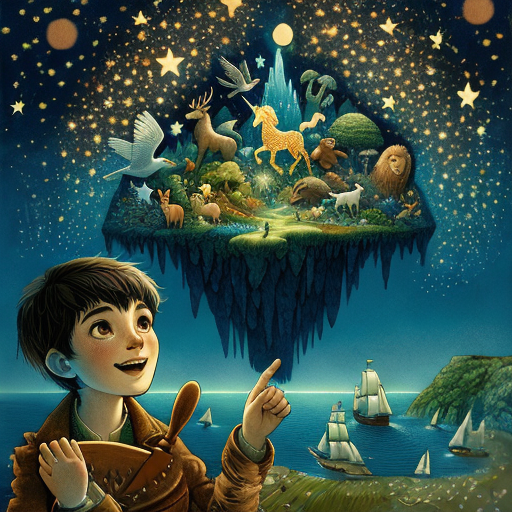

In [11]:

# Save and display the result
outpainted_image.save("outpainted_image.png")
display(outpainted_image)